In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import torch
from src.d05_regression_model import Trainer

torch.use_deterministic_algorithms(True) 


W1002 09:43:56.823000 22804 site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


In [4]:
trainer = Trainer('cuda', tracking=True, experiment='Assembly Inspector Counter')

In [ ]:
#model = trainer.train_model(folder='./data/temp/counting_imgs/screwdriver/scale_0.35', part='screwdriver', num_in_assembly=1)

In [ ]:
model = trainer.train_model(folder='./data/temp/counting_imgs/wheels_five/scale_0.2', part='screw', num_in_assembly=5, enable_profiler=True)

🏃 View run ._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter at: http://127.0.0.1:8080/#/experiments/462556796437455892/runs/f3bebb96e95b4fe187b764bb5c821bbf
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/462556796437455892
Training...


KeyboardInterrupt: 

In [3]:
dls = trainer.get_dataloaders('./data/temp/counting_imgs/wheels_five/scale_0.2/screw', [3, 672, 378], 5, 'screw')

[0 1 2 3 4 5 6] [3 0 0 ... 5 6 1]
[0.29753027 1.7210084  1.72778403 1.7414966  1.7210084  1.34618755
 1.7210084 ]


In [4]:
dls = trainer.get_dataloaders('./data/temp/counting_imgs/wheels_five/scale_0.2/screw', [3, 672, 378], 5, 'screw')

[0 1 2 3 4 5 6] [2 0 1 ... 2 0 0]
[0.29732869 1.7210084  1.73461321 1.72778403 1.7210084  1.34618755
 1.73461321]


Samples amount: 325


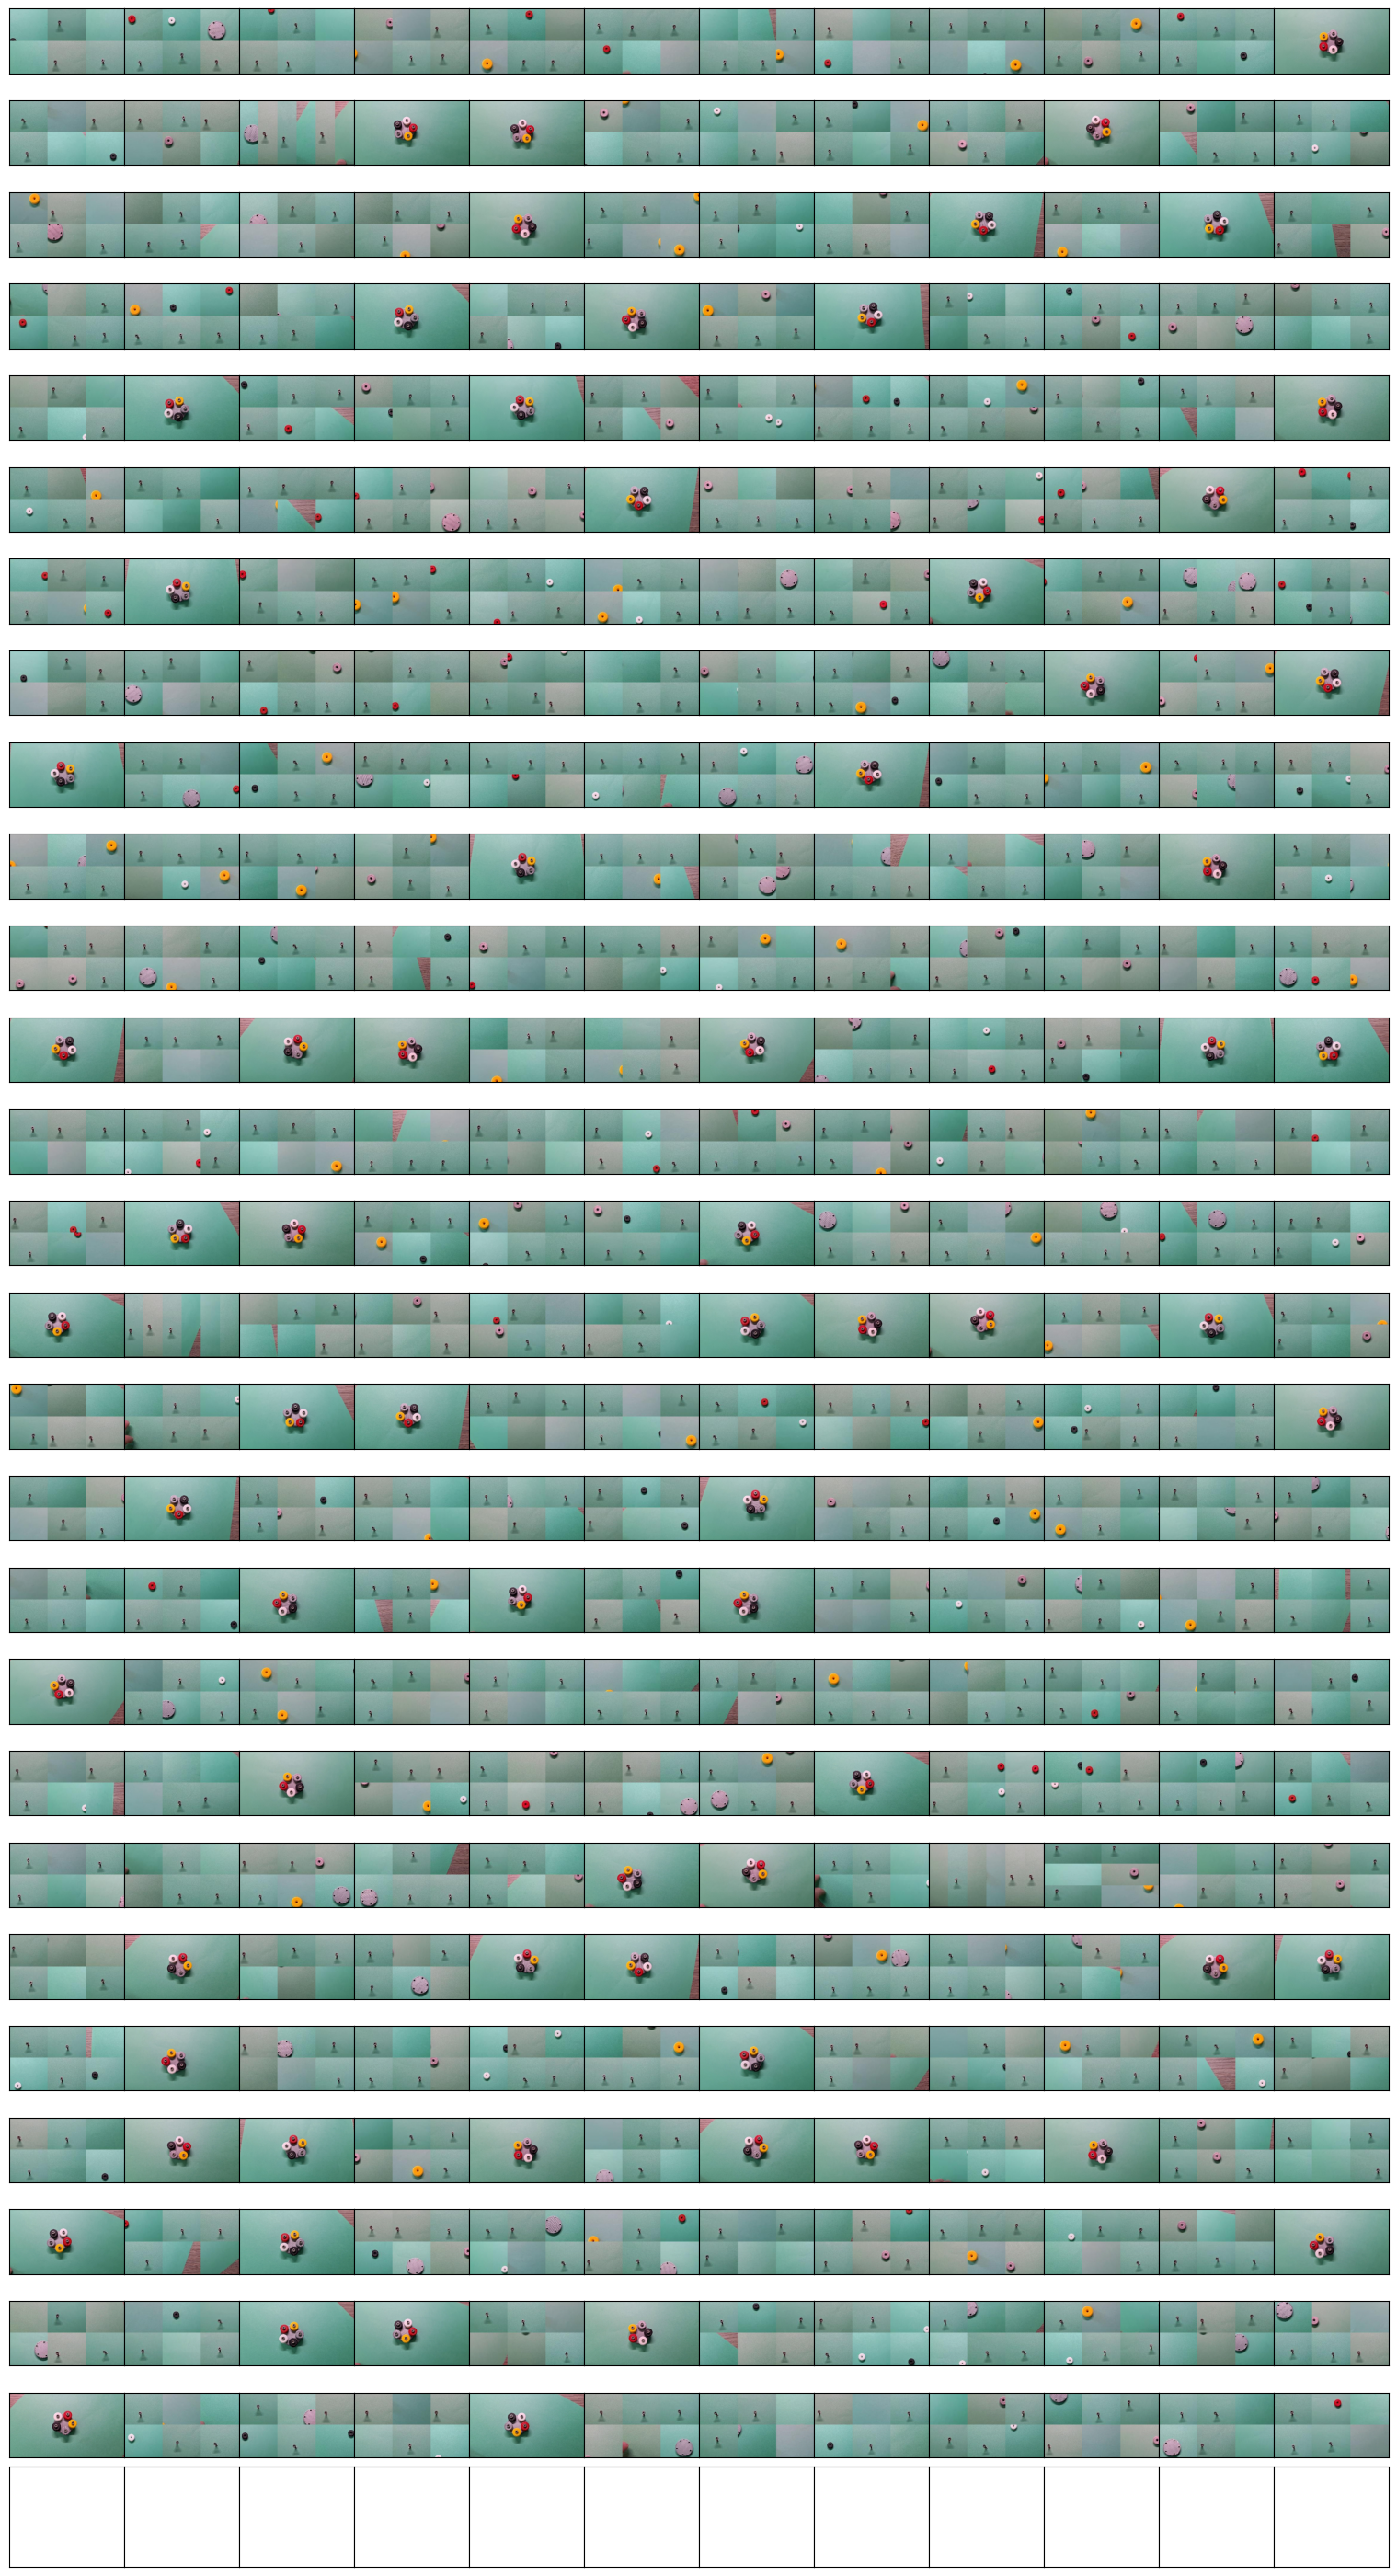

In [10]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
#from PIL import Image
from torchvision.transforms.functional import to_pil_image
import math

def show_target_imgs(loader: DataLoader, target):
    _COLUMNS = 12
    imgs_num = 0
    
    for X, y in loader:
        for one_y in y:
            if one_y == target:
                imgs_num += 1
    print("Samples amount:", imgs_num)            

    rows = math.ceil(imgs_num / _COLUMNS)
    if rows in (0, 1):
        rows = 2

    f, ax = plt.subplots(rows, _COLUMNS, figsize=(15, 1*rows))

    for plot in ax.ravel():
        plot.set_xticks([])
        plot.set_yticks([])

    num = 0
    for X, y in loader:
        for i in range(len(X)):
            if y[i] == target:
                ax[num // _COLUMNS, num % _COLUMNS].imshow(to_pil_image(X[i]*0.5 + 0.5, mode="RGB"))
                num += 1

    plt.tight_layout(pad=0)
    plt.show()

show_target_imgs(dls['train'][0], 3)